In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_embedded_vector(cb_or_sb):
    if cb_or_sb == 'cb':
        df_deal_vec = pd.read_csv('df_item_cbwin5_trainset.csv.gz', compression='gzip')
        df_user_vec = pd.read_csv('df_user_cbwin5_trainset.csv.gz', compression='gzip')
        df_deal_vec.dealvec = df_deal_vec.dealvec.map(lambda x: x[2:-2].split())
    if cb_or_sb == 'sb':
        df_deal_vec = pd.read_csv('df_item_sbwin5_trainset.csv.gz', compression='gzip')
        df_user_vec = pd.read_csv('df_user_sbwin5_trainset.csv.gz', compression='gzip')
        df_deal_vec.dealvec = df_deal_vec.dealvec.map(lambda x: x[1:-1].split())
    df_deal_vec = df_deal_vec[['deal_id', 'dealvec']]
    df_user_vec = df_user_vec[['account_id', 'uservec']]
    df_user_vec.uservec = df_user_vec.uservec.map(lambda x: x[2:-2].split())

    for i in range(200):
        df_deal_vec['dealvec_' + cb_or_sb + str(i)] = df_deal_vec.dealvec.map(lambda x: float(x[i]))
    for i in range(200):
        df_user_vec['uservec_'+ cb_or_sb + str(i)] = df_user_vec.uservec.map(lambda x: float(x[i]))
    return df_deal_vec, df_user_vec

In [3]:
df_deal_vec_sb, df_user_vec_sb = read_embedded_vector('sb')
df_deal_vec_cb, df_user_vec_cb = read_embedded_vector('cb')

In [4]:
df_new_user_vec = pd.read_csv('df_user_sb_trainset_newmethod.csv.gz', compression='gzip')
df_new_user_vec.uservec = df_new_user_vec.uservec.map(lambda x: x[1:-1].split())
for i in range(200):
    df_new_user_vec['new_uservec_'+ 'sb' + str(i)] = df_new_user_vec.uservec.map(lambda x: float(x[i]))

In [5]:
# split train_test by time
work_path = ''
#train_order_path = 'train_order_add_negasmpl.gz'
train_order_dc_path = 'train_order_add_negasmpl_dealcnt.gz'
valid_order_dc_path = 'valid_order_add_negasmpl_dealcnt.gz'
#valid_order_uc_path ='valid_order_add_negasmpl.gz'
test_order_uc_path = 'test_order_add_negasmpl.gz'
test_order_dc_path = 'test_order_add_negasmpl_dealcnt.gz'
test_order_sguc_path ='test_order_simple_sample_uc.gz'
test_order_sgdc_path = 'test_order_single_sample.gz'

In [6]:
def merge_embedded_vec(df_path):
    df = pd.read_csv(work_path + df_path, compression='gzip')
    df = df[['account_id', 'deal_id', 'rating']]
    df_new = pd.merge(df, df_deal_vec_sb, how='left', left_on=['deal_id'], right_on=['deal_id'])
    df_new = pd.merge(df_new, df_user_vec_sb, how='left', left_on=['account_id'], right_on=['account_id'])
    df_new = pd.merge(df_new, df_deal_vec_cb, how='left', left_on=['deal_id'], right_on=['deal_id'])
    df_new = pd.merge(df_new, df_user_vec_cb, how='left', left_on=['account_id'], right_on=['account_id'])
    df_new = pd.merge(df_new, df_new_user_vec, how='left', left_on=['account_id'], right_on=['account_id'])
    df_new = df_new.dropna()
    return df_new

In [7]:
#train_order = merge_embedded_vec(train_order_path)
train_order_dc = merge_embedded_vec(train_order_dc_path)
valid_order_dc = merge_embedded_vec(valid_order_dc_path)
#valid_order_uc = merge_embedded_vec(valid_order_uc_path)
test_order_uc = merge_embedded_vec(test_order_uc_path)
test_order_dc = merge_embedded_vec(test_order_dc_path)
test_order_sguc = merge_embedded_vec(test_order_sguc_path)
test_order_sgdc = merge_embedded_vec(test_order_sgdc_path)

/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
'''
train_order_after1 = pd.merge(train_order_after1, df_deal, how='left', left_on=['deal_id'], right_on=['deal_id'])
valid_order_after1 = pd.merge(valid_order_after1, df_deal, how='left', left_on=['deal_id'], right_on=['deal_id'])
test_order_after1 = pd.merge(test_order_after1, df_deal, how='left', left_on=['deal_id'], right_on=['deal_id'])

train_order_after1 = pd.merge(train_order_after1, df_dealprofile, how='left', left_on=['deal_id'], right_on=['deal_id'])
valid_order_after1 = pd.merge(valid_order_after1, df_dealprofile, how='left', left_on=['deal_id'], right_on=['deal_id'])
test_order_after1 = pd.merge(test_order_after1, df_dealprofile, how='left', left_on=['deal_id'], right_on=['deal_id'])
'''

In [8]:
user_vec_name = []
deal_vec_name = []
for i in range(200):
    user_vec_name.append('uservec_sb' + str(i))
    deal_vec_name.append('dealvec_sb' + str(i))

In [9]:
cb_user_vec_name = []
cb_deal_vec_name = []
for i in range(200):
    cb_user_vec_name.append('uservec_cb' + str(i))
    cb_deal_vec_name.append('dealvec_cb' + str(i))

In [10]:
new_user_vec_name = []
for i in range(200):
    new_user_vec_name.append('new_uservec_sb' + str(i))

In [11]:
feature_list = deal_vec_name + user_vec_name + cb_deal_vec_name + cb_user_vec_name

In [12]:
sb_feature_list = deal_vec_name + user_vec_name
cb_feature_list = cb_deal_vec_name + cb_user_vec_name

In [13]:
new_sb_feature_list = deal_vec_name + new_user_vec_name

In [14]:
len(new_sb_feature_list)

400

In [75]:
len(train_order_dc)/2, len(valid_order_dc)/2, len(test_order_dc)/2

(1582936.0, 34051.5, 3342.0)

## ------------------------------------------------------------
## analysis

In [236]:
test_posmp = test_order.loc[test_order.rating == 1]
test_posmp = test_posmp[['account_id', 'deal_id', 'rating']]
test_posmp_bought = pd.merge(train_order, test_posmp, on=['account_id', 'deal_id'])

In [237]:
valid_posmp = valid_order.loc[valid_order.rating == 1]
valid_posmp = valid_posmp[['account_id', 'deal_id', 'rating']]
valid_posmp_bought = pd.merge(train_order_after1, valid_posmp, on=['account_id', 'deal_id'])

In [238]:
valid_posmp_bought.shape

(274, 808)

In [239]:
test_deal_uni = test_posmp.deal_id.unique()

In [244]:
train_deal_uni = train_order.loc[train_order.rating == 1].deal_id.unique()

In [245]:
train_deal_uni = list(train_deal_uni)
test_deal_uni = list(test_deal_uni)

In [246]:
new_deal_list = list(set(test_deal_uni) - set(train_deal_uni))

In [247]:
len(test_deal_uni), len(new_deal_list)

(2816, 2633)

In [248]:
test_account_uni = test_posmp.account_id.unique()
train_account_uni = train_order.loc[train_order.rating == 1].account_id.unique()
train_account_uni = list(train_account_uni)
test_account_uni = list(test_account_uni)
new_account_list = list(set(test_account_uni)-set(train_account_uni))

In [249]:
len(test_account_uni), len(new_account_list)

(23913, 3869)

In [250]:
valid_account_uni = valid_posmp.account_id.unique()
valid_account_uni = list(valid_account_uni)
new_account_list = list(set(valid_account_uni) - set(train_account_uni))

In [251]:
len(valid_account_uni), len(new_account_list)

(42988, 9185)

In [252]:
valid_deal_uni = valid_posmp.deal_id.unique()
valid_deal_uni = list(valid_deal_uni)
new_deal_list = list(set(valid_deal_uni) - set(train_deal_uni))

In [253]:
len(valid_deal_uni), len(new_deal_list)

(3450, 2166)

# GBDT model

In [14]:
def learning_rate_power(current_round):
    base_learning_rate = 0.0019000424246380565
    min_learning_rate = 0.001
    lr = base_learning_rate * np.power(0.995,current_round)
    return max(lr, min_learning_rate)

In [15]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_jobs=20, objective='binary',random_state=1)
opt_params = {
    'n_estimators': 100000,
    'boosting_type': 'GBDT',
    'objective': 'binary',
    'num_leaves': 6298,
    'min_child_samples':32,
    'reg_lambda':0.01,
    'bagging_freq': 6,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.35
}
fit_params = {
    'early_stopping_rounds':100,
    'eval_metric': 'accuracy',
    'eval_set': (valid_order_dc.loc[:, feature_list], valid_order_dc.rating),
    'verbose': 20,
    'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_power)]
}
lgb_clf.set_params(**opt_params)
lgb_clf.fit(train_order_dc.loc[:, feature_list], train_order_dc.rating,**fit_params)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's binary_logloss: 0.686027
[40]	valid_0's binary_logloss: 0.68017
[60]	valid_0's binary_logloss: 0.675181
[80]	valid_0's binary_logloss: 0.671066
[100]	valid_0's binary_logloss: 0.667537
[120]	valid_0's binary_logloss: 0.664574
[140]	valid_0's binary_logloss: 0.662007
[160]	valid_0's binary_logloss: 0.659679
[180]	valid_0's binary_logloss: 0.657496
[200]	valid_0's binary_logloss: 0.655329
[220]	valid_0's binary_logloss: 0.653336
[240]	valid_0's binary_logloss: 0.651578
[260]	valid_0's binary_logloss: 0.649689
[280]	valid_0's binary_logloss: 0.647913
[300]	valid_0's binary_logloss: 0.64641
[320]	valid_0's binary_logloss: 0.644955
[340]	valid_0's binary_logloss: 0.643633
[360]	valid_0's binary_logloss: 0.642394
[380]	valid_0's binary_logloss: 0.64128
[400]	valid_0's binary_logloss: 0.640151
[420]	valid_0's binary_logloss: 0.639174
[440]	valid_0's binary_logloss: 0.638195
[460]	valid_0's binary_logloss: 0.637462
[

LGBMClassifier(bagging_fraction=0.4, bagging_freq=6, boost='gbdt',
        boost_from_average='false', boosting_type='GBDT',
        class_weight=None, colsample_bytree=1.0, feature_fraction=0.35,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=32, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100000, n_jobs=20, num_leaves=6298,
        objective='binary', random_state=1, reg_alpha=0.0, reg_lambda=0.01,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_auc_score, roc_curve

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
def eval_diff_dataset(df_name, feature_list):
    pred = lgb_clf.predict(df_name.loc[:, feature_list])
    print(namestr(df_name, globals())[0] + '_accuracy: ',  accuracy_score(df_name.rating, pred))
    #print(namestr(df_name, globals())[0] + '_auc: ',  roc_auc_score(df_name.rating, lgb_clf.predict(df_name.loc[:, feature_list])))
    print(classification_report(df_name.rating, pred))

In [17]:
eval_diff_dataset(train_order_dc, feature_list)

/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


train_order_dc_accuracy:  0.9241324349184048
             precision    recall  f1-score   support

          0       0.95      0.90      0.92   1582936
          1       0.90      0.95      0.93   1582936

avg / total       0.93      0.92      0.92   3165872



In [18]:
eval_diff_dataset(test_order_dc, feature_list)

test_order_dc_accuracy:  0.6172950329144224
             precision    recall  f1-score   support

          0       0.60      0.70      0.65      3332
          1       0.64      0.53      0.58      3352

avg / total       0.62      0.62      0.61      6684



/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


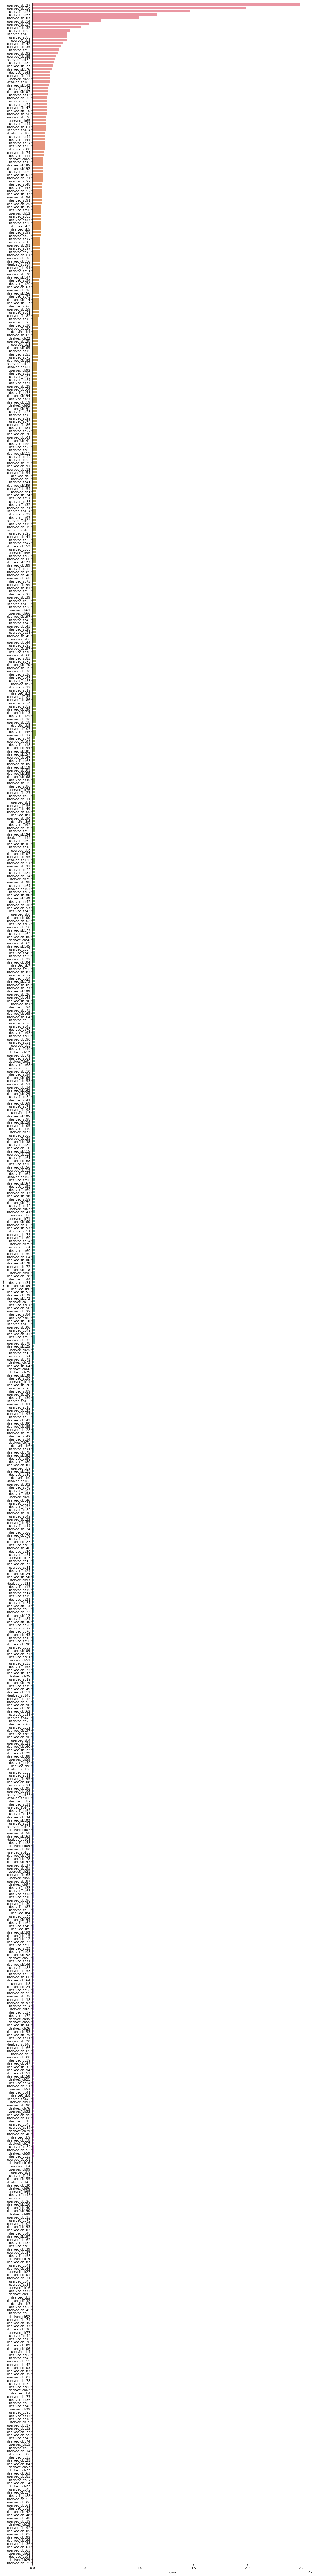

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
feat_importance = pd.DataFrame()
feat_importance["feature"] = feature_list
feat_importance["gain"] = lgb_clf.booster_.feature_importance(importance_type='gain')
feat_importance.sort_values(by='gain', ascending=False, inplace=True)
plt.figure(figsize=(16,150))
ax = sns.barplot(y="feature", x="gain", data=feat_importance)

In [78]:
total_gain_cb_user,total_gain_sb_user,total_gain_cb_deal,total_gain_sb_deal = 0.,0.,0.,0.

In [79]:
for i in range(200):
    total_gain_cb_user += feat_importance.loc[feat_importance['feature'] == ('uservec_cb' + str(i))].gain.values
    total_gain_sb_user += feat_importance.loc[feat_importance['feature'] == ('uservec_sb' + str(i))].gain.values
    total_gain_cb_deal += feat_importance.loc[feat_importance['feature'] == ('dealvec_cb' + str(i))].gain.values
    total_gain_sb_deal += feat_importance.loc[feat_importance['feature'] == ('dealvec_sb' + str(i))].gain.values

In [80]:
total_gain = total_gain_cb_deal+total_gain_sb_deal+total_gain_cb_user+total_gain_sb_user
print('total_gain_sb_deal:' + str(total_gain_sb_deal/total_gain))
print('total_gain_cb_deal:' + str(total_gain_cb_deal/total_gain))
print('total_gain_sb_user:' + str(total_gain_sb_user/total_gain))
print('total_gain_cb_user:' + str(total_gain_cb_user/total_gain))

total_gain_sb_deal:[0.20647323]
total_gain_cb_deal:[0.09140953]
total_gain_sb_user:[0.56369273]
total_gain_cb_user:[0.1384245]


In [ ]:
ax = lgb.plot_importance(lgb_clf, max_num_features=20)
plt.show()

In [57]:
import lightgbm as lgb
from sklearn.externals import joblib

In [57]:
joblib.dump(lgb_clf, 'lgb_clf_cb.pkl')

['lgb_clf_cb.pkl']

In [58]:
lgb_clf = joblib.load('lgb_clf_csb.pkl')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.089269 to fit


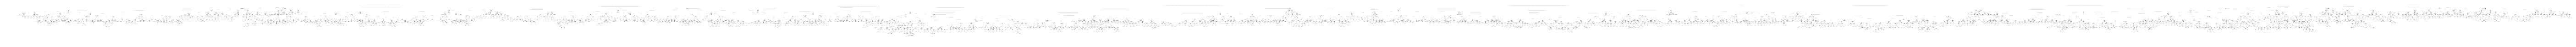

In [67]:
ax = lgb.plot_tree(lgb_clf, tree_index = 3, figsize=(100,25), show_info=['split_gain'])
plt.show()

## ------------------------------------------------------------------------------------------------------------------
## analysis

In [58]:
work_path = ''
deal_path = ''
deal_profile_path = ''
deal_profile_path2 = ''
df_deal = pd.read_csv(work_path + deal_path, sep = '\t', compression='gzip')
df_dealprofile = pd.read_csv(work_path + deal_profile_path, sep = '\t', compression='gzip')
df_dealprofile2 = pd.read_csv(work_path + deal_profile_path2, sep = '\t', compression='gzip')

/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,14,15,51,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,13,26,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,3,9,10,13,17,18,24,25,26,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
df_dealpro_total = df_dealprofile.append(df_dealprofile2)

In [88]:
test_order_after4eval = test_order_dc[['account_id', 'deal_id', 'rating']]
pred_result = lgb_clf.predict(test_order_dc.loc[:,  feature_list])
pred_proba = lgb_clf.predict_proba(test_order_dc.loc[:,  feature_list])

In [89]:
#pred_result = np.load('nn_result.npy')

In [90]:
test_order_after4eval['pred'] = pred_result
test_order_after4eval['pred_proba'] = pred_proba[:,1]

/home/mmde-lab/anaconda3/envs/whxPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## -------------------------------------------------------------
## analysis for deal per sale amount

In [91]:
test_dealc = pd.DataFrame(test_order_after4eval.loc[test_order_after4eval.rating == 1].deal_id.value_counts())
test_dealc = test_dealc.rename(columns= {'deal_id':'sell_count'})
test_dealc['test_false_pred'] = test_order_after4eval.loc[test_order_after4eval.rating == 1].loc[test_order_after4eval.pred == 0].deal_id.value_counts()
test_dealc['test_true_pred'] = test_order_after4eval.loc[test_order_after4eval.rating == 1].loc[test_order_after4eval.pred == 1].deal_id.value_counts()
#test_dealc = test_dealc.reset_index()
#test_dealc.columns = ['deal_id','sell_count']

In [93]:
test_sell_amount = pd.DataFrame(test_dealc.sell_count.value_counts().sort_index())
test_sell_amount = test_sell_amount.rename(columns= {'sell_amount':'group_num'})
test_sell_amount = test_sell_amount.reset_index()
test_sell_amount.columns = ['sell_amount','group_num']

test_true_p = pd.DataFrame(test_dealc.groupby('sell_count')['test_true_pred'].agg(np.sum))
test_true_p = test_true_p.reset_index()
test_true_p.columns = ['sell_amount','true_pred_num']
test_true_p = test_true_p[['true_pred_num']]

df_I_want = pd.concat([test_sell_amount, test_true_p], axis=1)
df_I_want['total_per_slamount'] = df_I_want.sell_amount * df_I_want.group_num
df_I_want['pred_presion_per_slamount'] = df_I_want.true_pred_num/ df_I_want.total_per_slamount
df_I_want['log_slamt'] = df_I_want.sell_amount.map(lambda x: np.math.log(1+ x))

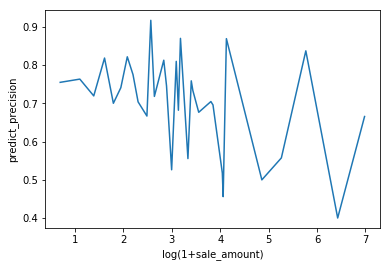

In [94]:
plt.plot(df_I_want.log_slamt, df_I_want.pred_presion_per_slamount)
plt.xlabel('log(1+sale_amount)')
plt.ylabel('predict_precision')
plt.show()

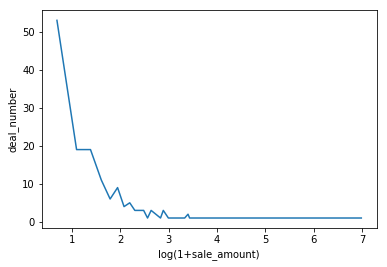

In [95]:
plt.plot(df_I_want.log_slamt, df_I_want.group_num)
plt.xlabel('log(1+sale_amount)')
plt.ylabel('deal_number')
plt.show()

## -----------------------------------------------------------------------------------
## analysis for user per bought amount

In [96]:
test_userc = pd.DataFrame(test_order_after4eval.loc[test_order_after4eval.rating == 1].account_id.value_counts())
test_userc = test_userc.rename(columns= {'account_id':'bought_amount'})
test_userc['test_false_pred'] = test_order_after4eval.loc[test_order_after4eval.rating == 1].loc[test_order_after4eval.pred == 0].account_id.value_counts()
test_userc['test_true_pred'] = test_order_after4eval.loc[test_order_after4eval.rating == 1].loc[test_order_after4eval.pred == 1].account_id.value_counts()

In [97]:
test_bought_amount = pd.DataFrame(test_userc.bought_amount.value_counts().sort_index())
test_bought_amount = test_bought_amount.rename(columns= {'bought_amount':'group_num'})
test_bought_amount = test_bought_amount.reset_index()
test_bought_amount.columns = ['bought_amount','group_num']

test_true_pr_user = pd.DataFrame(test_userc.groupby('bought_amount')['test_true_pred'].agg(np.sum))
test_true_pr_user = test_true_pr_user.reset_index()
test_true_pr_user.columns = ['bought_amount','true_pred_num']
test_true_pr_user = test_true_pr_user[['true_pred_num']]

df_I_want_user = pd.concat([test_bought_amount, test_true_pr_user], axis=1)
df_I_want_user['total_per_botamount'] = df_I_want_user.bought_amount * df_I_want_user.group_num
df_I_want_user['pred_presion_per_botamount'] = df_I_want_user.true_pred_num/ df_I_want_user.total_per_botamount
df_I_want_user['log_botamt'] = df_I_want_user.bought_amount.map(lambda x: np.math.log(1+ x))

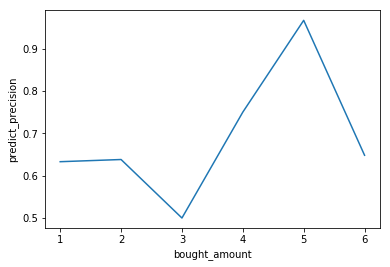

In [98]:
plt.plot(df_I_want_user.bought_amount, df_I_want_user.pred_presion_per_botamount)
plt.xlabel('bought_amount')
plt.ylabel('predict_precision')
plt.show()

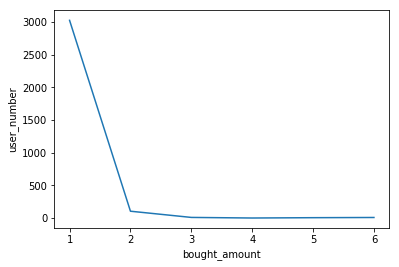

In [99]:
plt.plot(df_I_want_user.bought_amount, df_I_want_user.group_num)
plt.xlabel('bought_amount')
plt.ylabel('user_number')
plt.show()

## -----------------------------------------------------------
## analysis for same product with different ID

In [341]:
df_dealpro_total.deal_title.value_counts().head(10)

ボツ                                                             1761
ダミー                                                             237
ドロップの為ボツ                                                        127
ミス                                                              105
ぼつ                                                               67
【毎日ポイントプレゼント】12月1日～12月31日の毎日《WALLET ポイント》をご応募いただいた方全員にプレゼント      50
［2色展開］CCILU AMAZON                                               44
【毎日ポイントプレゼント】1月1日～1月31日の毎日《WALLET ポイント》をご応募いただいた方全員にプレゼント        43
間違い                                                              43
【発注用】SK-II フェイシャルトリートメントエッセンス                                    37
Name: deal_title, dtype: int64

In [339]:
df_dealpro_total.deal_description.value_counts().head()

★★★ダミーディール★★★                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [345]:
tdf = df_deal.query("[311822., 311837., 312061., 312073., 312085., 312102., 312114.,\
       356775., 356788., 356975., 356980., 356985., 356993., 356999.,\
       224793., 224819., 224820., 224821., 224822., 240097., 240101.,\
       240112., 257402., 257403., 257413., 257437., 257441., 257445.,\
       257452., 257453., 284436., 284439., 284447., 284452., 284458.,\
       284537., 284542., 311822., 311837., 312061., 312073., 312085.,\
       312102., 312114.] in deal_id")

In [344]:
check_deal_id

array([311822., 311837., 312061., 312073., 312085., 312102., 312114.,
       356775., 356788., 356975., 356980., 356985., 356993., 356999.,
       224793., 224819., 224820., 224821., 224822., 240097., 240101.,
       240112., 257402., 257403., 257413., 257437., 257441., 257445.,
       257452., 257453., 284436., 284439., 284447., 284452., 284458.,
       284537., 284542., 311822., 311837., 312061., 312073., 312085.,
       312102., 312114.])

In [346]:
for col in tdf.columns:
    if(len(tdf[col].value_counts()) > 1):
        print(col, end=':')
        print(len(tdf[col].value_counts()), end='  ')

deal_id:37  deal_group_id:10  start_tm:6  end_tm:6  deal_price:8  discount_rate:13  max_amount:27  max_amount_per_account:27  ordered_flg:2  np_cart_flg:2  

In [349]:
tdf[['deal_id','deal_price','discount_rate','max_amount']]

,deal_id,deal_price,discount_rate,max_amount
223793,224793,2970,44,80.0
223819,224819,2970,44,65.0
223820,224820,2210,58,80.0
223821,224821,2210,58,70.0
223822,224822,2210,58,80.0
238957,240097,2970,44,62.0
238961,240101,2210,58,70.0
238972,240112,2210,58,80.0
256244,257402,2970,44,52.0
256245,257403,2050,61,55.0


In [342]:
df_dealpro_total.loc[df_dealpro_total.deal_title == '［2色展開］CCILU AMAZON'].deal_description

16738     特殊なEVA「ccilucell（チルセル）」を使用したスリッポンは、新感覚の快適な履き心地...
16753     特殊なEVA「ccilucell（チルセル）」を使用したスリッポンは、新感覚の快適な履き心地...
16977     軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリーな履き心地のシューズ。安...
16989     軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリーな履き心地のシューズ。安...
17001     軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリーな履き心地のシューズ。安...
17018     軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリーな履き心地のシューズ。安...
17030     軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリーな履き心地のシューズ。安...
61063     <p class="p">特殊なEVA「ccilucell（チルセル）」を使用したスリッポン...
61076     <p class="p">特殊なEVA「ccilucell（チルセル）」を使用したスリッポン...
61262     <p class="p">軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリ...
61267     <p class="p">軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリ...
61272     <p class="p">軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリ...
61280     <p class="p">軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリ...
61286     <p class="p">軽量で衝撃吸収、耐摩耗性、抗菌に優れた特殊樹脂で作り上げた、エアリ...
224632    特殊なEVA「ccilucell（チルセル）」を使用したスリッポンは、新感覚の快適な履き心地...
224658    特殊なEVA「ccilucell（チルセル）」を使用したスリッポンは、新感覚の快適な履き心地...
224659    特殊なEVA「ccilucell（チルセル）」を使用したスリ